In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import classification_report

In [5]:
import tensorflow as tf

In [6]:
df=pd.read_csv('iris.csv')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 5)

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
le=LabelEncoder()

In [13]:
df['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [14]:
df['species']=le.fit_transform(df['species'])

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
X=df.drop('species',axis=1)
Y=df['species']

In [18]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [21]:
ss=StandardScaler()

In [22]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [23]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(2,activation='relu',input_shape=(X.shape[1],)),
      tf.keras.layers.Dense(3,activation='relu'),
      tf.keras.layers.Dense(3,activation='softmax')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy')

In [26]:
trained_model=model.fit(X_train_ss,Y_train,epochs=30,batch_size=10)

Epoch 1/30
11/11 [==============================] - 0s 5ms/step - loss: 1.8268
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 1.5924
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 1.4404
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 1.3319
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 1.2621
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 1.2142
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 1.1777
Epoch 8/30
11/11 [==============================] - 0s 4ms/step - loss: 1.1472
Epoch 9/30
11/11 [==============================] - 0s 4ms/step - loss: 1.1265
Epoch 10/30
11/11 [==============================] - 0s 4ms/step - loss: 1.1095
Epoch 11/30
11/11 [==============================] - 0s 4ms/step - loss: 1.0954
Epoch 12/30
11/11 [==============================] - 0s 4ms/step - loss: 1.0840
Epoch 13/30
11/11 [==============================

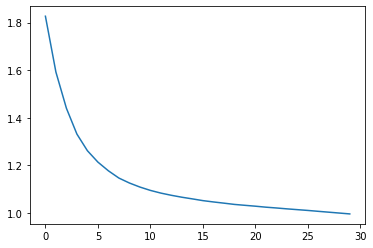

In [27]:
plt.plot(trained_model.history['loss'])

In [28]:
Y_pred=model.predict(X_test_ss)

In [29]:
Y_pred=Y_pred.argmax(axis=1)

In [30]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.50      0.40      0.44        15
           2       0.53      0.53      0.53        15

    accuracy                           0.62        45
   macro avg       0.60      0.62      0.61        45
weighted avg       0.60      0.62      0.61        45

